In [76]:
import pandas as pd
import numpy as np
import joblib
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split as TTS
from sklearn.metrics import f1_score
import xgboost as xgb
import warnings
warnings.filterwarnings('ignore')

In [77]:
d = pd.read_csv('dataset_full.csv')

In [78]:
d = d[['qty_params', 'tld_present_params',
       
       'length_url', 'qty_dot_url', 'qty_hyphen_url', 'qty_underline_url',
       'qty_slash_url', 'qty_questionmark_url', 'qty_equal_url',
       'qty_at_url', 'qty_and_url', 'qty_exclamation_url',
       'qty_space_url', 'qty_tilde_url', 'qty_comma_url',
       'qty_plus_url', 'qty_asterisk_url', 'qty_hashtag_url',
       'qty_dollar_url', 'qty_percent_url',
       
       'directory_length', 'qty_dot_directory', 'qty_hyphen_directory', 'qty_underline_directory',
       'qty_slash_directory', 'qty_questionmark_directory', 'qty_equal_directory',
       'qty_at_directory', 'qty_and_directory', 'qty_exclamation_directory',
       'qty_space_directory', 'qty_tilde_directory', 'qty_comma_directory',
       'qty_plus_directory', 'qty_asterisk_directory', 'qty_hashtag_directory',
       'qty_dollar_directory', 'qty_percent_directory',
      
       'file_length', 'qty_dot_file', 'qty_hyphen_file', 'qty_underline_file',
       'qty_slash_file', 'qty_questionmark_file', 'qty_equal_file',
       'qty_at_file', 'qty_and_file', 'qty_exclamation_file',
       'qty_space_file', 'qty_tilde_file', 'qty_comma_file',
       'qty_plus_file', 'qty_asterisk_file', 'qty_hashtag_file',
       'qty_dollar_file', 'qty_percent_file',
       
       'params_length', 'qty_dot_params', 'qty_hyphen_params', 'qty_underline_params',
       'qty_slash_params', 'qty_questionmark_params', 'qty_equal_params',
       'qty_at_params', 'qty_and_params', 'qty_exclamation_params',
       'qty_space_params', 'qty_tilde_params', 'qty_comma_params',
       'qty_plus_params', 'qty_asterisk_params', 'qty_hashtag_params',
       'qty_dollar_params', 'qty_percent_params',
       
       'email_in_url', 'time_domain_activation', 'time_domain_expiration',
       
       'phishing']]

In [79]:
len(d.columns)

78

In [80]:
d

,qty_params,tld_present_params,length_url,qty_dot_url,qty_hyphen_url,qty_underline_url,qty_slash_url,qty_questionmark_url,qty_equal_url,qty_at_url,...,qty_comma_params,qty_plus_params,qty_asterisk_params,qty_hashtag_params,qty_dollar_params,qty_percent_params,email_in_url,time_domain_activation,time_domain_expiration,phishing
0,-1,-1,25,3,0,0,1,0,0,0,...,-1,-1,-1,-1,-1,-1,0,-1,-1,1
1,3,0,223,5,0,1,3,0,3,0,...,0,0,0,0,0,0,0,579,150,1
2,-1,-1,15,2,0,0,1,0,0,0,...,-1,-1,-1,-1,-1,-1,0,-1,-1,0
3,-1,-1,81,4,0,2,5,0,0,0,...,-1,-1,-1,-1,-1,-1,0,-1,-1,1
4,-1,-1,19,2,0,0,0,0,0,0,...,-1,-1,-1,-1,-1,-1,0,6998,306,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88642,-1,-1,23,3,1,0,0,0,0,0,...,-1,-1,-1,-1,-1,-1,0,5509,334,0
88643,-1,-1,34,2,0,0,0,0,0,0,...,-1,-1,-1,-1,-1,-1,0,5046,431,0
88644,-1,-1,70,2,1,0,5,0,0,0,...,-1,-1,-1,-1,-1,-1,0,1844,712,1
88645,-1,-1,28,2,0,0,1,0,0,0,...,-1,-1,-1,-1,-1,-1,0,-1,-1,1


# Principal Component Analysis

In [81]:
xtrain, xtest, ytrain, ytest = TTS(d.drop('phishing', axis = 1), d['phishing'], random_state = 41)

In [82]:
xtrain.shape

(66485, 77)

In [83]:
f = []
for i in range(1, len(xtrain.columns)+1) :
    pca = PCA(n_components = i, random_state = 41)
    x_train = pca.fit_transform(xtrain)
    x_test = pca.transform(xtest)
    model = xgb.XGBClassifier(random_state = 41)
    model.fit(x_train, ytrain)
    pred = model.predict(x_test)
    f.append(f1_score(ytest, pred))

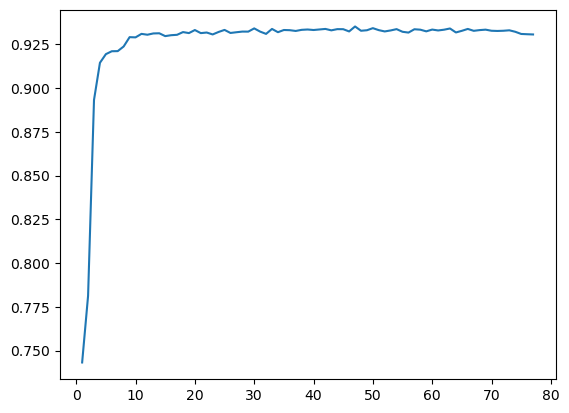

In [84]:
plt.plot(range(1, len(xtrain.columns)+1), f)

In [85]:
pca = PCA(n_components = 10, random_state = 41)

In [86]:
x_train = pca.fit_transform(d.drop('phishing', axis = 1))

# ML MODEL

In [87]:
model = xgb.XGBClassifier(random_state = 41)

In [88]:
model.fit(x_train, d['phishing'])

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=41, ...)

In [89]:
model.feature_importances_

array([0.098796  , 0.01309462, 0.07545116, 0.07946634, 0.14876202,
       0.01581579, 0.02352355, 0.50201404, 0.02110788, 0.0219686 ],
      dtype=float32)

# PIPELINE

In [90]:
pipe = Pipeline([('pca', pca), ('model', model)])
pipe

Pipeline(steps=[('pca', PCA(n_components=10, random_state=41)),
                ('model',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, random_state=41, ...))])

In [92]:
joblib.dump(pipe, 'pipeline.joblib')

['pipeline.joblib']